<a href="https://colab.research.google.com/github/INmais/LEIS-2001-collaborative-project/blob/main/Mobility/Mobility_geospatial_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geospatial Data

## Info

Geopandas: https://geopandas.org/

Fiona: https://pypi.org/project/Fiona/

Sharpely: https://pypi.org/project/Shapely/

PySal: https://pysal.org/


 # Troubleshooting

###Notes
Install in a separare virtual enviroment (namely shapely, geocondas and fiona from pip, not conda), otherwise will may get error due to different versions ('Shell is not a LinearRing'error) when reading shapefiles with geopandas

 ![alt text](https://pbs.twimg.com/media/D6yQSjwX4AAWTMt?format=jpg&name=small)

Need to install libspatialindex and rtree. otherwise error "Could not find libspatialindex_c library file" or perform any spatial operation, as spatial join.

Install rtree before geopandas!

More info: https://geopandas.org/getting_started/install.html#dependencies


In [ ]:
#if needed remove # before each line and run
!apt-get install -qq curl g++ make

In [ ]:
#if needed remove # before each line and run
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0  1467k      0 --:--:-- --:--:-- --:--:-- 1467k


In [ ]:
import os
os.chdir('spatialindex-src-1.8.5')

In [ ]:
#if needed remove # before each line and run
!./configure

/bin/bash: ./configure: /bin/sh: bad interpreter: Permission denied


In [ ]:
!make

CDPATH="${ZSH_VERSION+.}:" && cd . && aclocal-1.14 -I m4
/bin/bash: aclocal-1.14: command not found
Makefile:457: recipe for target 'aclocal.m4' failed
make: *** [aclocal.m4] Error 127


In [ ]:
!make install

CDPATH="${ZSH_VERSION+.}:" && cd . && aclocal-1.14 -I m4
/bin/bash: aclocal-1.14: command not found
Makefile:457: recipe for target 'aclocal.m4' failed
make: *** [aclocal.m4] Error 127


In [ ]:
!pip install rtree

In [ ]:
#if needed remove # before each line and run
!ldconfig

/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
#if needed remove # before each line and run
from rtree import index
from rtree.index import Rtree

In [ ]:
#install needed libraries
! pip install geopandas
! pip install contextily
! pip install plotly
! pip install shapely

In [ ]:
#base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from pathlib import Path
#Maps
import geopandas as gpd
import plotly as pl

# Data 

Municipalities shapefile (Portugal)

Where are importing from shared google drive whereas:

a) can add you (if you don´t know how can check https://github.com/INmais/LEIS-2001-collaborative-project/blob/main/General/Tutorial_I_Loading_Data.ipynb

b) go https://dados.gov.pt/en/datasets/concelhos-de-portugal/ download, unzip file and replace path to read the file

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
# files in "content/drive/Shared drives/Reliable Project".
!ls "/content/drive/Shareddrives/IN+/LEIS Colaborative Project/Data/concelhos-shapefile.zip (Unzipped Files)"

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
concelhos.cpg  concelhos.prj  concelhos.shp
concelhos.dbf  concelhos.qpj  concelhos.shx


In [ ]:
import os
os.chdir('/content/drive/Shareddrives/IN+/LEIS Colaborative Project') # Provide the new path here

## Municipalities Portugal

In [ ]:
fp = "/content/drive/Shareddrives/IN+/LEIS Colaborative Project/Data/concelhos-shapefile.zip (Unzipped Files)/concelhos.shp" #shapefile
map_df = gpd.read_file(fp) # similar to pandas, reading file

In [ ]:
# most importan is "geometry" tha has each poligon per municipaly
map_df

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291 38.76507, -7.79287 38.76506..."
1,182,PRT,Portugal,1,Évora,2,Alandroal,PT.EV.AL,0,0701,Concelho,Municipality,None,None,"POLYGON ((-7.25937 38.77351, -7.25921 38.77343..."
2,182,PRT,Portugal,1,Évora,3,Arraiolos,PT.EV.AR,0,0702,Concelho,Municipality,None,None,"POLYGON ((-7.88611 38.92495, -7.88580 38.92472..."
3,182,PRT,Portugal,1,Évora,4,Borba,PT.EV.BO,0,0703,Concelho,Municipality,None,None,"POLYGON ((-7.46362 38.92344, -7.46344 38.92329..."
4,182,PRT,Portugal,1,Évora,5,Estremoz,PT.EV.ES,0,0704,Concelho,Municipality,None,None,"POLYGON ((-7.52770 39.00080, -7.52765 39.00066..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,182,PRT,Portugal,20,Viseu,302,Tarouca,PT.VI.TR,0,1820,Concelho,Municipality,None,None,"POLYGON ((-7.72591 41.08079, -7.72442 41.08028..."
304,182,PRT,Portugal,20,Viseu,303,Tondela,PT.VI.TO,0,1821,Concelho,Municipality,None,None,"POLYGON ((-8.12772 40.64028, -8.12751 40.64027..."
305,182,PRT,Portugal,20,Viseu,304,Vila Nova de Paiva,PT.VI.VP,0,1822,Concelho,Municipality,None,None,"POLYGON ((-7.77933 40.93439, -7.77835 40.93436..."
306,182,PRT,Portugal,20,Viseu,305,Viseu,PT.VI.VS,0,1823,Concelho,Municipality,None,None,"POLYGON ((-7.80686 40.83789, -7.80653 40.83787..."


In [ ]:
# can check bounds
map_df.total_bounds

array([-31.26818657,  30.03017616,  -6.18914223,  42.15431595])

In [ ]:
map_df['NAME_2']

0                   Évora
1               Alandroal
2               Arraiolos
3                   Borba
4                Estremoz
              ...        
303               Tarouca
304               Tondela
305    Vila Nova de Paiva
306                 Viseu
307               Vouzela
Name: NAME_2, Length: 308, dtype: object

In [ ]:
map_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# just removing islands to be easier to see mainland
new_map_df = map_df[(map_df.NAME_1 != 'Madeira') & (map_df.NAME_1 != 'Azores')]

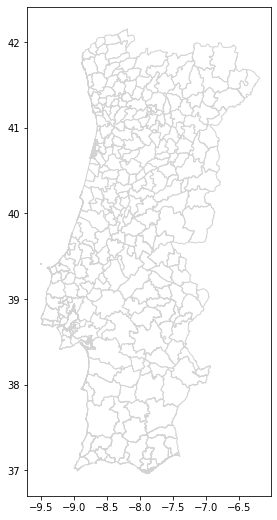

In [ ]:
new_map_df.plot(color='white', edgecolor='lightgrey', figsize=(11,9))

In [ ]:
# we will be using this file to merge population in each munucipality and then merge with shapefile
DATA_FILEPATH_pop = 'https://raw.githubusercontent.com/INmais/LEIS-2001-collaborative-project/main/Mobility/Dados/pordata-populac%CC%A7ao%20residente.csv' 
pop = pd.read_csv(DATA_FILEPATH_pop, sep=';')
pop

,Âmbito Geográfico,Anos,1981,2001,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,NUTS 2013,Portugal,9 883 670,10 394 669,10 563 014,10 573 479,10 572 721,10 542 398,10 487 289,10 427 301,10 374 822,10 341 330,10 309 573,10 291 027,10 276 617,10 295 909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NUTS I,Continente,9 384 013,9 904 113,10 051 206,10 059 864,10 057 999,10 030 968,9 976 649,9 918 548,9 869 783,9 839 140,9 809 414,9 792 797,9 779 826,9 798 859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NUTS II,Norte,3 435 810,3 696 333,3 712 554,3 705 980,3 693 585,3 687 224,3 666 234,3 644 195,3 621 785,3 603 778,3 584 575,3 576 205,3 572 583,3 575 338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NUTS III,Alto Minho,258 004,250 491,247 492,246 690,245 306,244 149,242 159,240 134,237 997,236 270,233 813,232 178,230 954,230 412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Município,Arcos de Valdevez,31 240,24 657,23 409,23 185,22 906,22 709,22 426,22 142,21 885,21 621,21 324,21 144,20 970,20 926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
# some data treatment neded, filtering, removing spaces, etc.
pop_mum = pop[pop['Âmbito Geográfico'] == 'Município']

In [ ]:
pop_mum_single = pop_mum[['Âmbito Geográfico','Anos','2017']]

In [ ]:
pop_mum_single['Anos']

4      Arcos de Valdevez
5                Caminha
6                Melgaço
7                 Monção
8       Paredes de Coura
             ...        
347        Ribeira Brava
348           Santa Cruz
349              Santana
350          São Vicente
352          Porto Santo
Name: Anos, Length: 308, dtype: object

In [ ]:
pop_mum_single.loc[pop_mum_single['Anos']=='Ponte de Sor']

,Âmbito Geográfico,Anos,2017
272,Município,Ponte de Sor,15 285


# Replacing names to match

Please notice that shapefile has Ponte de Sôr and this Ponte de Sor, so when merging will not match

you can just replace by the same same

In [ ]:
new_map_df['NAME_2'].replace('Ponte de Sôr', 'Ponte de Sor', inplace=True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
pop_mum_single.set_index('Anos').join(new_map_df.set_index('NAME_2'))
pp = new_map_df.join(pop_mum_single.set_index('Anos'), on='NAME_2')

In [ ]:
pp['2017'].dtype

dtype('O')

In [ ]:
pp['2017'] = pp['2017'].astype(str).str.replace('\s+', '') #removing spaces between numbers

In [ ]:
pp['2017'] = pd.to_numeric(pp['2017']) #dtype('O') to numeric

In [ ]:
pp['index'] = np.arange(len(pp))

In [ ]:
pp['index']

0        0
1        1
2        2
3        3
4        4
      ... 
303    273
304    274
305    275
306    276
307    277
Name: index, Length: 278, dtype: int64

Text(0.5, 1.0, 'Population 2017')

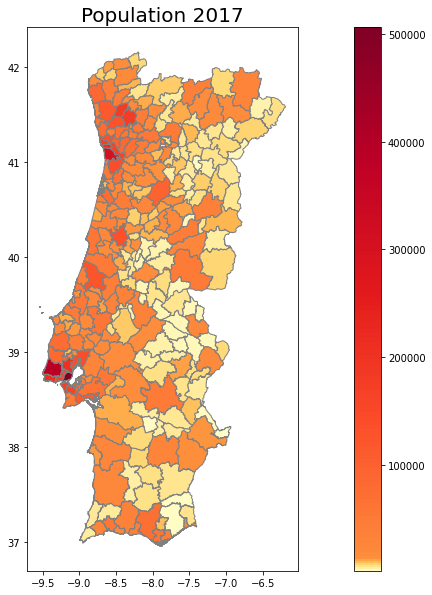

In [ ]:
from matplotlib import cm, colors
from matplotlib.colors import TwoSlopeNorm

# normalize color
vmin, vmax, vcenter = pp['2017'].min(), pp['2017'].max(), pp['2017'].median()
norm = TwoSlopeNorm(vmin=vmin,vcenter=vcenter, vmax=vmax)

# create a normalized colorbar
cmap = 'YlOrRd'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
aa = pp.plot(column='2017',figsize=(20,10), edgecolor='grey', cmap=cmap, norm=norm, legend=True)

# add colorbar
aa.set_title('Population 2017', fontsize=20)

In [ ]:
from urllib.request import urlopen
import json
import plotly.express as px


fig1 = px.choropleth_mapbox(pp, geojson=pp, locations='index', color='2017',
                           color_continuous_scale=["blue", "orange", "red"],
                           range_color=(20, 30),
                           mapbox_style="carto-positron",
                           zoom=10, center = {"lat": 41.785061, "lon": -7.781880},
                           opacity=0.5)
fig1.show()

In [ ]:
# Taxa motorização
DATA_FILEPATH_taxamot = 'https://raw.githubusercontent.com/INmais/LEIS-2001-collaborative-project/main/Mobility/Dados/taxamot.csv' 
taxamot = pd.read_csv(DATA_FILEPATH_taxamot, sep=',')
taxamot

,Municipio,Tipo,x,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,x.11,x.12,x.13,x.14,x.15,x.16,x.17,x.18,x.19,x.20,x.21,x.22,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Abrantes,Ligeiros,19136,20510,20376,20358,20912,20351,20587,21028,21517,22197,22602,Município,39810,39464,38831,38201,37588,37116,36701,36284,35839,35377,35130,480.683245,519.714170,524.735392,532.917986,556.347771,548.308007,560.938394,579.539191,600.379475,627.441558,643.381725
1,Aguiar da Beira,Ligeiros,3118,3537,3501,3507,3502,3589,3719,3832,3931,4128,4291,Município,5581,5497,5410,5308,5224,5121,5040,4934,4831,4740,4652,558.681240,643.441877,647.134935,660.700829,670.367534,700.839680,737.896825,776.651804,813.703167,870.886076,922.398968
2,Alandroal,Ligeiros,3840,3097,2965,2907,2945,2892,3134,4337,4325,4340,4340,Município,5949,5869,5787,5687,5580,5450,5357,5271,5164,5064,4992,645.486636,527.687851,512.355279,511.165817,527.777778,530.642202,585.028934,822.804022,837.529047,857.030016,869.391026
3,Albergaria-a-Velha,Ligeiros,13949,15345,14977,15026,15152,15016,15351,15756,16047,16968,17639,Município,25243,25282,25089,24907,24724,24580,24476,24348,24260,24128,24144,552.588837,606.953564,596.954841,603.284217,612.845818,610.903173,627.185815,647.116806,661.459192,703.249337,730.574884
4,Albufeira,Ligeiros,22534,24781,25343,26534,28127,27089,27677,28712,29290,31722,33492,Município,39859,40796,40351,40190,40047,40107,40357,40633,40824,41123,41528,565.342833,607.437004,628.063741,660.213984,702.349739,675.418256,685.804197,706.617774,717.470116,771.393138,806.492005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Vouzela,Ligeiros,5221,5807,5784,5827,5855,5858,5968,6094,6235,6532,6764,Município,10736,10575,10469,10341,10222,10099,10037,9927,9783,9661,9619,486.307750,549.125295,552.488299,563.485156,572.784191,580.057431,594.599980,613.881334,637.330062,676.120484,703.191600
304,Águeda,Ligeiros,26749,29998,28914,28758,28938,29306,31218,36121,30896,32692,33789,Município,47962,47787,47572,47371,47127,46885,46825,46600,46333,45992,46075,557.712356,627.743947,607.794501,607.080281,614.042905,625.061320,666.695141,775.128755,666.824941,710.819273,733.347803
305,Évora,Ligeiros,28627,32061,31306,31504,31425,30940,31210,31656,31672,33225,34158,Município,56779,56653,56218,55624,55053,54271,53654,53294,52874,52454,52428,504.182885,565.918839,556.867907,566.374227,570.813580,570.101896,581.690088,593.988066,599.008965,633.412132,651.522087
306,Ílhavo,Ligeiros,19583,22004,21235,21300,21632,21633,21692,19087,24601,25266,26131,Município,38542,38624,38556,38502,38410,38273,38367,38406,38453,38405,38699,508.095065,569.697597,550.757340,553.218015,563.186670,565.228751,565.381708,496.979639,639.768029,657.883088,675.237086


In [ ]:
new_map_df['NAME_2'].replace('Ponte de Sôr', 'Ponte de Sor', inplace=True) 
new_map_df['NAME_2'].replace('Mêda', 'Meda', inplace=True) 
taxamot['Municipio'].replace('Mêda', 'Meda', inplace=True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Set index concelho and join with Map

setting the index and then merging on name_2

In [ ]:
taxamot.set_index('Municipio').join(new_map_df.set_index('NAME_2'))
taxamot_v2 = new_map_df.join(taxamot.set_index('Municipio'), on='NAME_2')

In [ ]:
taxamot_v2

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,Tipo,x,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,x.11,x.12,x.13,x.14,x.15,x.16,x.17,x.18,x.19,x.20,x.21,x.22,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291 38.76507, -7.79287 38.76506...",Ligeiros,28627,32061,31306,31504,31425,30940,31210,31656,31672,33225,34158,Município,56779,56653,56218,55624,55053,54271,53654,53294,52874,52454,52428,504.182885,565.918839,556.867907,566.374227,570.813580,570.101896,581.690088,593.988066,599.008965,633.412132,651.522087
1,182,PRT,Portugal,1,Évora,2,Alandroal,PT.EV.AL,0,0701,Concelho,Municipality,None,None,"POLYGON ((-7.25937 38.77351, -7.25921 38.77343...",Ligeiros,3840,3097,2965,2907,2945,2892,3134,4337,4325,4340,4340,Município,5949,5869,5787,5687,5580,5450,5357,5271,5164,5064,4992,645.486636,527.687851,512.355279,511.165817,527.777778,530.642202,585.028934,822.804022,837.529047,857.030016,869.391026
2,182,PRT,Portugal,1,Évora,3,Arraiolos,PT.EV.AR,0,0702,Concelho,Municipality,None,None,"POLYGON ((-7.88611 38.92495, -7.88580 38.92472...",Ligeiros,3242,3935,3626,3654,3631,3657,3723,3788,3757,4009,4167,Município,7403,7372,7373,7341,7302,7203,7107,7057,6999,6944,6928,437.930569,533.776451,491.794385,497.752350,497.261024,507.705123,523.849726,536.771999,536.790970,577.332949,601.472286
3,182,PRT,Portugal,1,Évora,4,Borba,PT.EV.BO,0,0703,Concelho,Municipality,None,None,"POLYGON ((-7.46362 38.92344, -7.46344 38.92329...",Ligeiros,3790,4089,4001,4050,4060,4081,4226,4259,4326,4414,4507,Município,7413,7348,7317,7245,7230,7121,7034,6950,6879,6790,6736,511.263996,556.477953,546.808801,559.006211,561.549101,573.093667,600.796133,612.805755,628.870475,650.073638,669.091449
4,182,PRT,Portugal,1,Évora,5,Estremoz,PT.EV.ES,0,0704,Concelho,Municipality,None,None,"POLYGON ((-7.52770 39.00080, -7.52765 39.00066...",Ligeiros,8071,8811,8324,8292,8605,8230,8285,8401,8543,8840,8919,Município,14503,14326,14186,13944,13740,13502,13306,13156,12975,12816,12728,556.505551,615.035600,586.775694,594.664372,626.273654,609.539328,622.651435,638.567954,658.420039,689.762797,700.738529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,182,PRT,Portugal,20,Viseu,302,Tarouca,PT.VI.TR,0,1820,Concelho,Municipality,None,None,"POLYGON ((-7.72591 41.08079, -7.72442 41.08028...",Ligeiros,3730,4039,4006,3995,4038,4126,4224,4394,4431,4687,4912,Município,8130,8068,8018,7959,7894,7833,7784,7752,7743,7761,7804,458.794588,500.619732,499.625842,501.947481,511.527743,526.745819,542.651593,566.821465,572.258814,603.917021,629.420810
304,182,PRT,Portugal,20,Viseu,303,Tondela,PT.VI.TO,0,1821,Concelho,Municipality,None,None,"POLYGON ((-8.12772 40.64028, -8.12751 40.64027...",Ligeiros,13857,15846,15937,16091,16182,16394,16665,16940,17018,17947,18564,Município,29315,29014,28733,28488,28167,27848,27701,27315,26942,26548,26357,472.693161,546.150134,554.658407,564.834316,574.502077,588.695777,601.602830,620.172067,631.653181,676.020792,704.329021
305,182,PRT,Portugal,20,Viseu,304,Vila Nova de Paiva,PT.VI.VP,0,1822,Concelho,Municipality,None,None,"POLYGON ((-7.77933 40.93439, -7.77835 40.93436...",Ligeiros,2639,2864,2891,2949,3006,3036,2962,2787,2831,3072,3190,Município,5293,5183,5135,5079,5007,4949,4909,4833,4792,4723,4687,498.583034,552.575728,562.999026,580.626107,600.359497,613.457264,603.381544,576.660459,590.776294,650.434046,680.605931
306,182,PRT,Portugal,20,Viseu,305,Viseu,PT.VI.VS,0,1823,Concelho,Municipality,None,None,"POLYGON ((-7.80686 40.83789, -7.80653 40.83787...",Ligeiros,49244,55388,55154,55707,56240,56954,58729,60484,61468,64631,67471,Município,98914,99313,99093,98778,98424,98093,98164,97849,97423,96991,97249,497.846614,557.711478,556.588255,563.961611,571.405348,580

In [ ]:
taxamot_v3 = taxamot_v2[['NAME_0','ID_1','NAME_1','ID_2',	'NAME_2', 'geometry','2017']]

In [ ]:
taxamot_v3 = gpd.GeoDataFrame(taxamot_v3, crs="EPSG:4326", geometry=taxamot_v3.geometry)

In [ ]:
taxamot_v3.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#sample de dados do FB
DATA_FILEPATH_VKT = 'https://raw.githubusercontent.com/INmais/LEIS-2001-collaborative-project/main/Mobility/Dados/sampleFB.csv' 
VKT = pd.read_csv(DATA_FILEPATH_VKT, sep=',') #for all parameters see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
VKT.fillna(value=0).head(5) #when stating .head will just show first n rows (this case 5), if using ".tail" will just show last n rows

,geometry,date_time,start_polygon_id,start_polygon_name,end_polygon_id,end_polygon_name,length_km,tile_size,country,level,n_crisis,n_baseline,n_difference,percent_change,is_statistically_significant,z_score,start_lat,start_lon,end_lat,end_lon,start_quadkey,end_quadkey
0,LINESTRING (-6.086425781249999 37.387615467117...,2020-04-13 0000,887173,Gines,887173,Gines,0.000000,13,ES,LEVEL4,1164,1150.4,13.6,1.181171,0,0.461667,37.386315,-6.076978,37.386315,-6.076978,331103312103,331103312103
1,"LINESTRING (-6.08642578125 36.9323280378846, -...",2020-04-13 0000,887179,Lebrija,887179,Lebrija,3.906906,13,ES,LEVEL4,18,15.6,2.4,14.457831,0,0.341812,36.938348,-6.060233,36.938348,-6.060233,331103330321,331103330323
2,"LINESTRING (-6.83349609375 39.11301158922029, ...",2020-04-13 0000,881866,Villar del Rey,881866,Villar del Rey,0.000000,13,ES,LEVEL4,31,32.8,-1.8,-5.325444,0,-0.577945,39.116953,-6.826874,39.116953,-6.826874,331101320322,331101320322
3,"LINESTRING (-6.83349609375 40.296284438846904,...",2020-04-13 0000,886606,Navasfrías,886606,Navasfrías,0.000000,13,ES,LEVEL4,11,14.6,-3.6,-23.076923,0,-1.981735,40.287266,-6.812784,40.287266,-6.812784,331101120300,331101120300
4,"LINESTRING (-6.83349609375 40.59726855264711, ...",2020-04-13 0000,886528,Fuentes de Oñoro,886528,Fuentes de Oñoro,0.000000,13,ES,LEVEL4,129,134.8,-5.8,-4.270987,0,-0.519391,40.575625,-6.789915,40.575625,-6.789915,331101102122,331101102122


In [ ]:
from shapely.geometry import Point
# combine lat and lon column to a shapely Point() object
VKT['geometry'] = VKT.apply(lambda x: Point((float(x.start_lon), float(x.start_lat))), axis=1)
VKT

,geometry,date_time,start_polygon_id,start_polygon_name,end_polygon_id,end_polygon_name,length_km,tile_size,country,level,n_crisis,n_baseline,n_difference,percent_change,is_statistically_significant,z_score,start_lat,start_lon,end_lat,end_lon,start_quadkey,end_quadkey
0,POINT (-6.076978070062599 37.386314551754),2020-04-13 0000,887173,Gines,887173,Gines,0.000000,13,ES,LEVEL4,1164,1150.4,13.6,1.181171,0,0.461667,37.386315,-6.076978,37.386315,-6.076978,331103312103,331103312103
1,POINT (-6.0602329817088 36.938347800433),2020-04-13 0000,887179,Lebrija,887179,Lebrija,3.906906,13,ES,LEVEL4,18,15.6,2.4,14.457831,0,0.341812,36.938348,-6.060233,36.938348,-6.060233,331103330321,331103330323
2,POINT (-6.8268744046258 39.116952642998),2020-04-13 0000,881866,Villar del Rey,881866,Villar del Rey,0.000000,13,ES,LEVEL4,31,32.8,-1.8,-5.325444,0,-0.577945,39.116953,-6.826874,39.116953,-6.826874,331101320322,331101320322
3,POINT (-6.8127838791074 40.287266224504),2020-04-13 0000,886606,Navasfrías,886606,Navasfrías,0.000000,13,ES,LEVEL4,11,14.6,-3.6,-23.076923,0,-1.981735,40.287266,-6.812784,40.287266,-6.812784,331101120300,331101120300
4,POINT (-6.789914982120099 40.575625284698),2020-04-13 0000,886528,Fuentes de Oñoro,886528,Fuentes de Oñoro,0.000000,13,ES,LEVEL4,129,134.8,-5.8,-4.270987,0,-0.519391,40.575625,-6.789915,40.575625,-6.789915,331101102122,331101102122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3824,POINT (-6.0763755078195 41.365131996455),2020-04-13 0000,888658,Bermillo de Sayago,888658,Bermillo de Sayago,0.000000,13,ES,LEVEL4,13,11.6,1.4,11.111111,0,0.501280,41.365132,-6.076376,41.365132,-6.076376,313323330300,313323330300
3825,POINT (-6.808115986863299 37.20830674734),2020-04-13 0000,884341,Moguer,884341,Moguer,0.000000,13,ES,LEVEL4,53,47.6,5.4,11.111111,0,0.524990,37.208307,-6.808116,37.208307,-6.808116,331103302302,331103302302
3826,POINT (-6.9117709846763 37.61563759769),2020-04-13 0000,884308,Calañas,884308,Calañas,0.000000,13,ES,LEVEL4,17,14.8,2.2,13.924051,0,1.229837,37.615638,-6.911771,37.615638,-6.911771,331103300100,331103300100
3827,POINT (-6.8846363663987 38.507293598649),2020-04-13 0000,881727,Barcarrota,881727,Barcarrota,0.000000,13,ES,LEVEL4,125,127.2,-2.2,-1.716069,0,-0.211499,38.507294,-6.884636,38.507294,-6.884636,331103102100,331103102100


In [ ]:
VKT.dtypes

geometry                         object
date_time                        object
start_polygon_id                  int64
start_polygon_name               object
end_polygon_id                    int64
end_polygon_name                 object
length_km                       float64
tile_size                         int64
country                          object
level                            object
n_crisis                          int64
n_baseline                      float64
n_difference                    float64
percent_change                  float64
is_statistically_significant      int64
z_score                         float64
start_lat                       float64
start_lon                       float64
end_lat                         float64
end_lon                         float64
start_quadkey                     int64
end_quadkey                       int64
dtype: object

In [ ]:
locations = VKT[['start_lat', 'start_lon']]
viagenslist = locations.values.tolist()
len(viagenslist)
viagenslist[3]

[40.287266224504, -6.8127838791074]

In [ ]:
distance = VKT[['start_lat', 'start_lon','length_km']]
distancelist = distance.values.tolist()
len(distancelist)
distancelist[220]

[37.104634656765, -6.1441825837148, 3.888875963258]

In [ ]:
gdf = gpd.GeoDataFrame(VKT, crs="EPSG:4326", geometry=VKT.geometry)

In [ ]:
gdf

,geometry,date_time,start_polygon_id,start_polygon_name,end_polygon_id,end_polygon_name,length_km,tile_size,country,level,n_crisis,n_baseline,n_difference,percent_change,is_statistically_significant,z_score,start_lat,start_lon,end_lat,end_lon,start_quadkey,end_quadkey
0,POINT (-6.07698 37.38631),2020-04-13 0000,887173,Gines,887173,Gines,0.000000,13,ES,LEVEL4,1164,1150.4,13.6,1.181171,0,0.461667,37.386315,-6.076978,37.386315,-6.076978,331103312103,331103312103
1,POINT (-6.06023 36.93835),2020-04-13 0000,887179,Lebrija,887179,Lebrija,3.906906,13,ES,LEVEL4,18,15.6,2.4,14.457831,0,0.341812,36.938348,-6.060233,36.938348,-6.060233,331103330321,331103330323
2,POINT (-6.82687 39.11695),2020-04-13 0000,881866,Villar del Rey,881866,Villar del Rey,0.000000,13,ES,LEVEL4,31,32.8,-1.8,-5.325444,0,-0.577945,39.116953,-6.826874,39.116953,-6.826874,331101320322,331101320322
3,POINT (-6.81278 40.28727),2020-04-13 0000,886606,Navasfrías,886606,Navasfrías,0.000000,13,ES,LEVEL4,11,14.6,-3.6,-23.076923,0,-1.981735,40.287266,-6.812784,40.287266,-6.812784,331101120300,331101120300
4,POINT (-6.78991 40.57563),2020-04-13 0000,886528,Fuentes de Oñoro,886528,Fuentes de Oñoro,0.000000,13,ES,LEVEL4,129,134.8,-5.8,-4.270987,0,-0.519391,40.575625,-6.789915,40.575625,-6.789915,331101102122,331101102122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3824,POINT (-6.07638 41.36513),2020-04-13 0000,888658,Bermillo de Sayago,888658,Bermillo de Sayago,0.000000,13,ES,LEVEL4,13,11.6,1.4,11.111111,0,0.501280,41.365132,-6.076376,41.365132,-6.076376,313323330300,313323330300
3825,POINT (-6.80812 37.20831),2020-04-13 0000,884341,Moguer,884341,Moguer,0.000000,13,ES,LEVEL4,53,47.6,5.4,11.111111,0,0.524990,37.208307,-6.808116,37.208307,-6.808116,331103302302,331103302302
3826,POINT (-6.91177 37.61564),2020-04-13 0000,884308,Calañas,884308,Calañas,0.000000,13,ES,LEVEL4,17,14.8,2.2,13.924051,0,1.229837,37.615638,-6.911771,37.615638,-6.911771,331103300100,331103300100
3827,POINT (-6.88464 38.50729),2020-04-13 0000,881727,Barcarrota,881727,Barcarrota,0.000000,13,ES,LEVEL4,125,127.2,-2.2,-1.716069,0,-0.211499,38.507294,-6.884636,38.507294,-6.884636,331103102100,331103102100


In [ ]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
taxamot_v2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

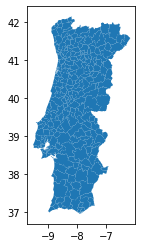

In [ ]:
taxamot_v2.plot()

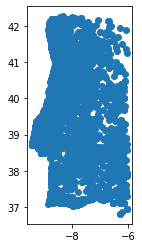

In [ ]:
gdf.plot()

In [ ]:
import rtree
import geopandas as gpd

cjoin = gpd.sjoin(gdf, taxamot_v3, how="inner", op='intersects')

In [ ]:
cjoin

,geometry,date_time,start_polygon_id,start_polygon_name,end_polygon_id,end_polygon_name,length_km,tile_size,country,level,n_crisis,n_baseline,n_difference,percent_change,is_statistically_significant,z_score,start_lat,start_lon,end_lat,end_lon,start_quadkey,end_quadkey,index_right,NAME_0,ID_1,NAME_1,ID_2,NAME_2,2017
5,POINT (-6.83697 40.61625),2020-04-13 0000,730785,Vilar Formoso,730785,Vilar Formoso,0.000000,13,PT,LEVEL5,12,10.2,1.8,16.071429,0,0.577945,40.616246,-6.836969,40.616246,-6.836969,331101102120,331101102120,137,Portugal,10,Guarda,136,Almeida,745.463543
38,POINT (-6.90481 40.72903),2020-04-13 0000,730759,Almeida,730759,Almeida,0.000000,13,PT,LEVEL5,37,35.2,1.8,4.972376,0,0.421927,40.729030,-6.904809,40.729030,-6.904809,331101100232,331101100232,137,Portugal,10,Guarda,136,Almeida,745.463543
113,POINT (-7.00723 40.58378),2020-04-13 0000,730760,Amoreira,730760,Amoreira,0.000000,13,PT,LEVEL5,18,12.0,6.0,46.153846,0,4.000000,40.583782,-7.007234,40.583782,-7.007234,331101102022,331101102022,137,Portugal,10,Guarda,136,Almeida,745.463543
6,POINT (-6.82409 41.09408),2020-04-13 0000,729855,Freixo de Espada à Cinta,729855,Freixo de Espada à Cinta,0.000000,13,PT,LEVEL5,16,15.8,0.2,1.190476,0,0.045061,41.094084,-6.824089,41.094084,-6.824089,313323322300,313323322300,83,Portugal,6,Bragança,83,Freixo de Espada à Cinta,599.463967
29,POINT (-6.87542 41.05270),2020-04-13 0000,729859,Poiares,729859,Poiares,0.000000,13,PT,LEVEL5,17,13.0,4.0,28.571429,0,1.568929,41.052701,-6.875423,41.052701,-6.875423,313323322213,313323322213,83,Portugal,6,Bragança,83,Freixo de Espada à Cinta,599.463967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,POINT (-9.42152 38.74208),2020-04-13 0000,728761,Alcabideche,728761,Alcabideche,3.811605,13,PT,LEVEL5,17,10.4,6.6,57.894737,0,1.430060,38.742081,-9.421517,38.742081,-9.421517,331102101021,331102101030,171,Portugal,12,Lisboa,170,Cascais,566.537877
3777,POINT (-9.42152 38.74208),2020-04-13 0000,728761,Alcabideche,728763,Cascais,3.812520,13,PT,LEVEL5,21,28.4,-7.4,-25.170068,0,-0.999635,38.742081,-9.421517,38.711721,-9.450110,331102101021,331102101023,171,Portugal,12,Lisboa,170,Cascais,566.537877
3778,POINT (-9.42152 38.74208),2020-04-13 0000,728761,Alcabideche,728761,Alcabideche,0.000000,13,PT,LEVEL5,913,881.6,31.4,3.557671,0,0.429280,38.742081,-9.421517,38.742081,-9.421517,331102101021,331102101021,171,Portugal,12,Lisboa,170,Cascais,566.537877
3784,POINT (-9.45011 38.71172),2020-04-13 0000,728763,Cascais,728763,Cascais,0.000000,13,PT,LEVEL5,133,126.0,7.0,5.511811,0,0.518875,38.711721,-9.450110,38.711721,-9.450110,331102101022,331102101022,171,Portugal,12,Lisboa,170,Cascais,566.537877


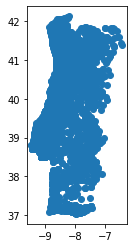

In [ ]:
cjoin.plot()